# Classification and Hypothesis Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
#Importing basic libraries required for the analysis of the given project

# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
#following code to visualize the plots in notebook's interface itself
%matplotlib inline 

import seaborn as sns

#Splitting arrays/matrices into training and test subsets 

from sklearn.model_selection import train_test_split

# Scikit-learn Algorithms associated with trees--Decision Tree(DT) and Random Forest(RF) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn Metrics to evaluate the model classifiers
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score
from sklearn import tree

# For hyperparameter tuning of the model from scikit-learn 
from sklearn.model_selection import GridSearchCV

#suppressing the warnings
import warnings
warnings.filterwarnings("ignore") 


## Data Overview

- Observations
- Sanity checks

In [2]:
#Loading the dataset
df= pd.read_csv("ExtraaLearn.csv")
'''I always prefer making a copy of dataset to work on data manipulation, 
data wrangling, and construction of model so that I can keep the original dataset
unchanged'''
#Let me choose 'el' abbreviation for ExtraaLearn 
el = df.copy()

In [3]:
#First and last 10 rows of the dataset
#Over 4500 datapoints, so I prefer the above number against the default five rows 
#Use head() and tail() from Pandas to do so 

#Let us see first 10 rows to quickly eyeball the dataset
el.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


In [4]:
#Last 10 rows of the dataset
el.tail(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4602,EXT4603,47,Professional,Website,Medium,4,339,2.068,Email Activity,No,No,No,No,No,0
4603,EXT4604,26,Professional,Website,Medium,4,150,2.149,Website Activity,No,No,No,No,No,0
4604,EXT4605,58,Professional,Website,Medium,2,555,3.305,Website Activity,No,No,No,No,No,1
4605,EXT4606,49,Professional,Mobile App,Medium,5,253,3.677,Website Activity,No,No,No,No,No,0
4606,EXT4607,58,Unemployed,Mobile App,High,7,210,3.598,Email Activity,No,No,No,No,No,0
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


### Observations:
1. Quick glimpse of the dataset shows us that it has 4612 observations i.e. 4612 'leads' who have converted or not converted as paid customers 
2. The DataFrame has 15 columns as mentioned in the data dictionary. 
3. The columns represent several factors which could possibly impact the possibility of lead converting to paid customer (the target variable which is also among one of the columns).

## Checking information on the dataset

In [5]:
#Type of dataframe 
type(el)

pandas.core.frame.DataFrame

In [6]:
# Dimension of the dataset 
el.shape 

(4612, 15)

### Observations:

- The dataframe has 4612 rows, and 15 columns
- Running type also helps me double check the type of data frame I have as there are certain attributes that could be run in pandas DataFrame only, and not for others (for instance, 'info', 'dtypes' are not the attributes of nd.array in Numpy )

In [7]:
#variables and the datatypes 
el. dtypes

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

In [8]:
#alternatively, more information on dataset 
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Observations: 

- All columns have 4612 entries or observations
- There are 14 columns or variables. Four are integers, one is float, and remaining nine are object.
- The similar frequency of all the columns indicate that there are no missing values. But I eyeballed the dataset to make sure there are no any odd (weird) entry of datapoints

In [9]:
#There do not seem to be any missing values in the dataset
#To double check, I can do the following
# Checking for missing values 
el.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [10]:
#the other way to check missing values would be to compute the percentage of possible NaN
pd.DataFrame(data={'% of Missing Values':round(el.isna().sum()/el.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
ID,0.0
age,0.0
current_occupation,0.0
first_interaction,0.0
profile_completed,0.0
website_visits,0.0
time_spent_on_website,0.0
page_views_per_visit,0.0
last_activity,0.0
print_media_type1,0.0


In [11]:
#Let me check unique values in each column
el.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [12]:
#drop the unique column
el.drop(columns='ID',inplace=True)

### Observation: 
- Here, we dropped the 'ID' variable as it is unique for each lead, and does not add value to our analysis

In [13]:
#just have a quick look if ID has been dropped
el.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Creating two groups of numerical and categorical variables

In [14]:
'''As I can observe there are both numerical and categorical variables, let me look at those
two types of variables separately by creating their separate groups'''
# First creating a group of numerical columns
num_cols=['age','website_visits','time_spent_on_website', 'page_views_per_visit']

# Creating a group of categorical variables 
cat_cols= ['current_occupation','first_interaction','profile_completed',
           'last_activity','print_media_type1', 'print_media_type2', 'digital_media',
           'educational_channels','referral', 'status' ]

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Summary statistics 
1. Numerical variables
2. Categorical variables 

In [15]:
#First, let us deal with the numerical variables
#summary statistics of the dataset, and arrangement of datapoints transposed
el[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


### Observations:

- The average age of a lead is around 46 years. It ranges from 18 to 63 years. This shows a good age diversity among the leads. 
- Leads, on average, tend to visit the website 3 times. It however seems to have outliers as 75th percentile value is 5, and the maximum value is 30. This requires to be explored further.
- Leads, tend to spend 724 seconds (the unit is not mentioned here but it looks like 'second' would be the sensible selection) on average.
- Once visited the website, a lead on average tends to view 3 pages. But as 75th percentile value is almost 4, and the maximum value is over 18, there seems to be outliers here as well. This also requires further attention.

### Exploring further deeper by visualizing the dataset

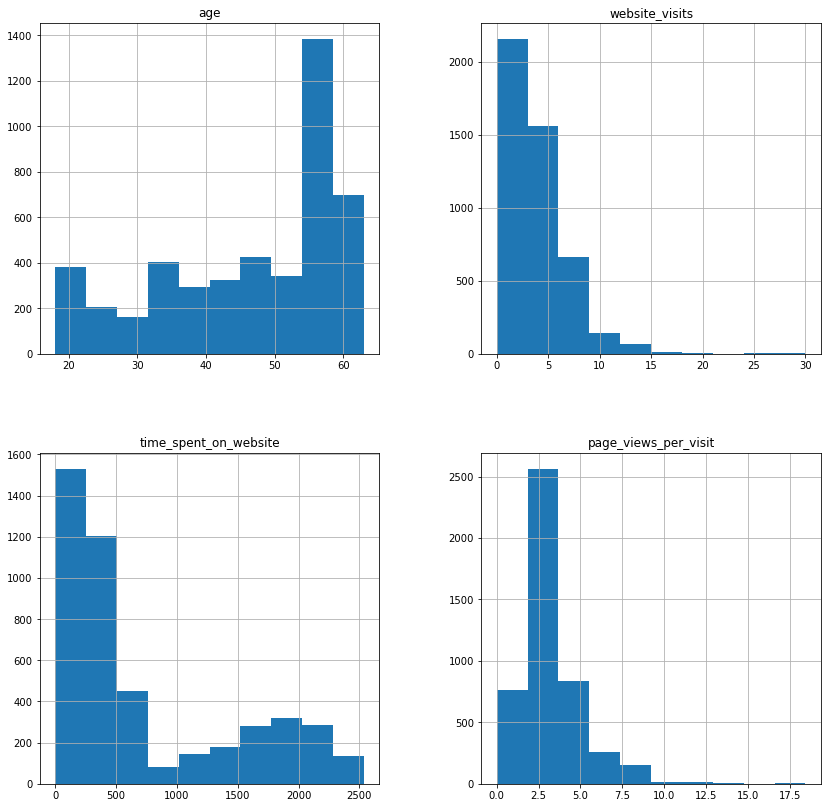

In [16]:
# Overall, histogram of all numerical variables 
el[num_cols].hist(figsize=(14,14))
plt.show()

### Hist_box plot gives me further information
I get a quick sense of how the data points are distributed for each numerical variable. I will further go ahead, and visualize using hist_box plot to get more information

In [17]:
#Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

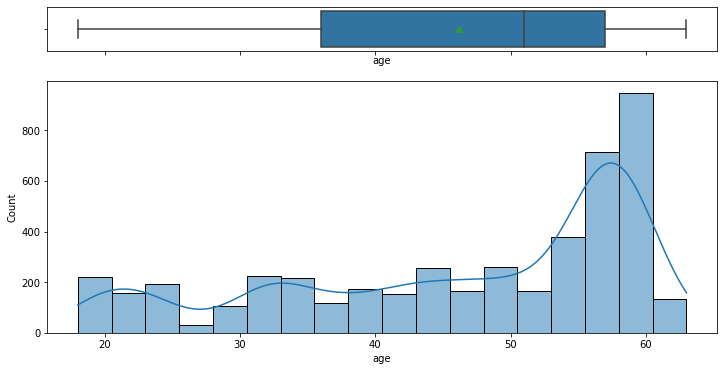

In [18]:
hist_box(el, "age")

### Observations: 
- No outliers here
- Skewed towards left
- Median is closer to Q3 indicating that the distribution is skewed to the left. The distribution plot also corroborates it.

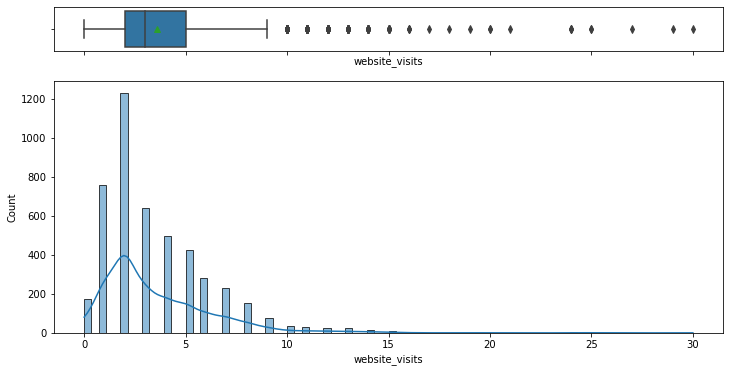

In [19]:
hist_box(el, "website_visits")

### Observations: 
- Quite a few outliers here
- Skewed towards right
- Median is closer to Q1 indicating that the distribution is skewed to the right. The distribution plot also corroborates it.

In [20]:
# Get a sense of what values and frequency I can keep discarding the outliers
df.website_visits.value_counts(normalize=True)

2     0.266479
1     0.163703
3     0.138985
4     0.107112
5     0.091500
6     0.061145
7     0.050304
0     0.037728
8     0.032741
9     0.016912
10    0.007372
11    0.006288
12    0.005421
13    0.004987
14    0.003686
15    0.001951
24    0.000650
16    0.000650
25    0.000434
20    0.000434
30    0.000217
18    0.000217
27    0.000217
21    0.000217
17    0.000217
19    0.000217
29    0.000217
Name: website_visits, dtype: float64

### Up to 9, almost 90% of the cases, so we can remove the remaining data points

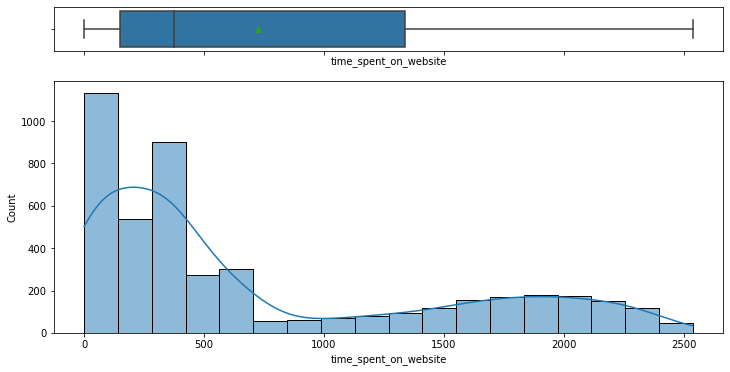

In [21]:
hist_box(el, "time_spent_on_website")

### Observation: 
- No outliers here
- Skewed right

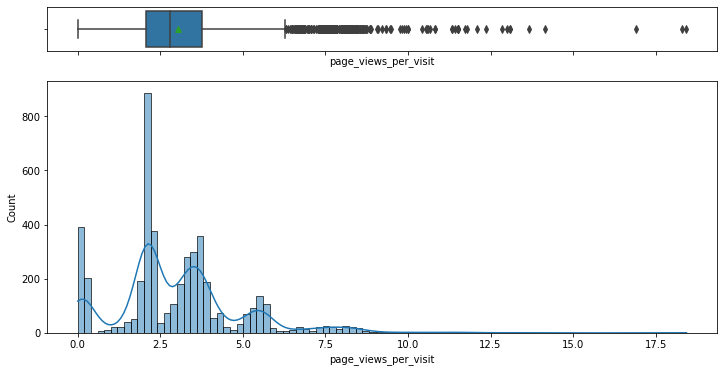

In [22]:
hist_box(el, "page_views_per_visit")

### Observations:
1. Many outliers here
2. Perhaps logarithmic transformation can solve the issue
3. As there are some many outliers, only dropping a few outliers would not resolve the problem

In [23]:
count_page_views = df.page_views_per_visit.value_counts(normalize=True)
#pd.set_option('display.max_rows', None)
#Initially I set to none to visualize all the value counts
#Later I set it to 50 when I rerun, which you can see below
pd.set_option('display.max_rows', 50)
print(count_page_views)

0.000    0.039245
2.168    0.003036
2.154    0.002819
2.200    0.002602
2.170    0.002385
           ...   
5.793    0.000217
4.944    0.000217
5.624    0.000217
1.413    0.000217
2.692    0.000217
Name: page_views_per_visit, Length: 2414, dtype: float64


- so many outliers here. 0 pages visit has the maximum 3.9%. The number of pages visit seem to vary too much here.

### Ways to address outliers

In [24]:
# Ways to address the outliers
#removal of outliers
#OR, logarithmic transformation of the dataset
#I may have to do the log transformation of page_views_per_visit to address the issue
# I may leave it as it is as the models I am concerned in this project are DT and RF
# And, DT and RF are not sensitive to outliers 
# So if we are using these two models, then we may not do this preprocessing step at all

el.drop(index= el[el.website_visits>9].index, inplace=True)

#Up to 9, almost 90% of the cases, so we can remove the remaining data points
# But still it could be crucial remaining 10% which is widely distributed from 10 to 29
# that's quite a huge range, and each data point has very very less frequency

In [25]:
el['website_visits'].value_counts()

2    1229
1     755
3     641
4     494
5     422
6     282
7     232
0     174
8     151
9      78
Name: website_visits, dtype: int64

### I have commented out logarithmic transformation, as it also does not seem to be helpful here

In [26]:
#Logarithmic transformation of page_views_per_visit
# pd.set_option('display.max_rows', 50)
# el['page_views_per_visit']= np.log(el['page_views_per_visit'])
# print(el['page_views_per_visit'])
# #el.head()

In [27]:
# el.dropna(axis=0, inplace=True)

In [28]:
# el['page_views_per_visit'].value_counts()

In [29]:
# null_count = el.isna().sum()
# print(null_count)

In [30]:
# hist_box(el, "page_views_per_visit")

### What I did above stepwise: 
  - First, I did the logarithmic transformation
  - Second, once I did it, I can see some NaN values 
  - I dropped NaN values 
  - And, plotted the histogram again
  - But, I can notice only the direction of outliers have changed
  - So I decided that I would leave the outliers as they are, and _leave the machine learning models like DT and RF to take care of them themselves_. 

In [31]:
el.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4458 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4458 non-null   int64  
 1   current_occupation     4458 non-null   object 
 2   first_interaction      4458 non-null   object 
 3   profile_completed      4458 non-null   object 
 4   website_visits         4458 non-null   int64  
 5   time_spent_on_website  4458 non-null   int64  
 6   page_views_per_visit   4458 non-null   float64
 7   last_activity          4458 non-null   object 
 8   print_media_type1      4458 non-null   object 
 9   print_media_type2      4458 non-null   object 
 10  digital_media          4458 non-null   object 
 11  educational_channels   4458 non-null   object 
 12  referral               4458 non-null   object 
 13  status                 4458 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 522.4+ 

### Current occupation

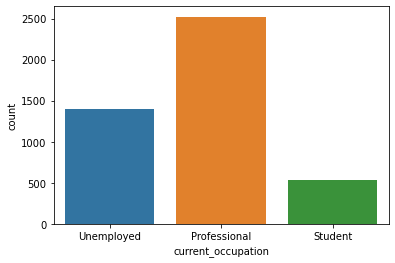

In [32]:
#Now let's visualize the categorical variables 
sns.countplot(x = el['current_occupation'])
plt.show()

In [33]:
el['current_occupation'].value_counts(normalize=True)

Professional    0.565725
Unemployed      0.314939
Student         0.119336
Name: current_occupation, dtype: float64

- Most of the leads are professional. 
- Among the leads with ExtraaLearn, almost one third are unemployed. 
- Professionals and unemployed account for almost 88% of the leads. 

### First interaction

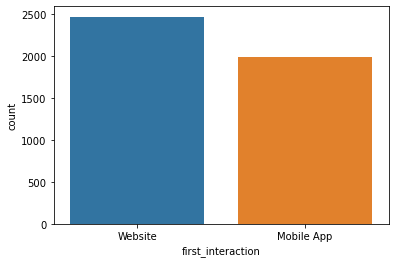

In [34]:
sns.countplot(x = el['first_interaction'])
plt.show()

In [35]:
el['first_interaction'].value_counts(normalize=True)

Website       0.553611
Mobile App    0.446389
Name: first_interaction, dtype: float64

- People tend to have first interaction with ExtraaLearn almost on par via websites and mobile app though website is slightly on higher end

### Profile completed 

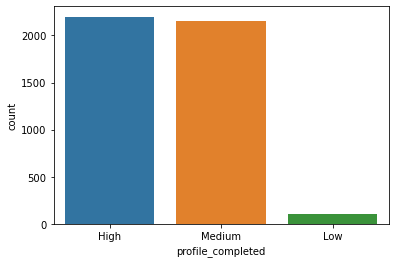

In [36]:
sns.countplot(x = el['profile_completed'])
plt.show()

In [37]:
el['profile_completed'].value_counts(normalize=True)

High      0.492822
Medium    0.483849
Low       0.023329
Name: profile_completed, dtype: float64

Number of Leads who tend to complete or partially complete their profile on website is closer to 98%

### Last activity

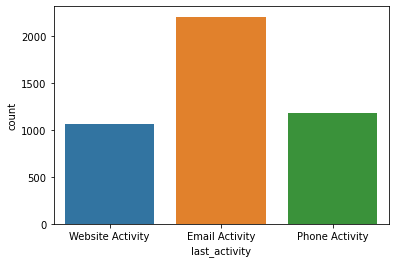

In [38]:
sns.countplot(x = el['last_activity'])
plt.show()

In [39]:
el['last_activity'].value_counts(normalize=True)

Email Activity      0.494841
Phone Activity      0.265814
Website Activity    0.239345
Name: last_activity, dtype: float64

- Number of leads who interact with ExtraaLearn via email is the highest

### Newspaper 

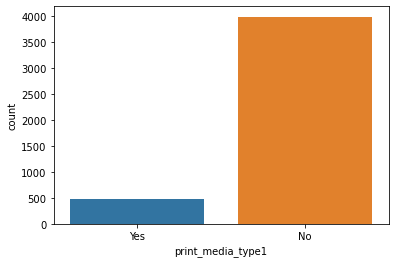

In [40]:
sns.countplot(x = el['print_media_type1'])
plt.show()

In [41]:
el['print_media_type1'].value_counts(normalize=True)

No     0.893226
Yes    0.106774
Name: print_media_type1, dtype: float64

Only 10% of the leads have seen ad of ExtraaLearn in newspaper

### Magazine

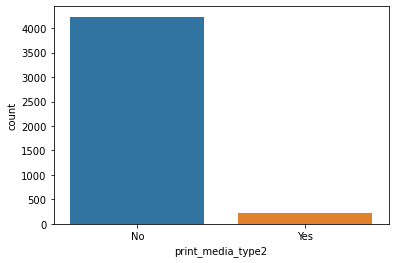

In [42]:
sns.countplot(x = el['print_media_type2'])
plt.show()

In [43]:
el['print_media_type2'].value_counts(normalize=True)

No     0.948856
Yes    0.051144
Name: print_media_type2, dtype: float64

- Only a few leads report to have seen ad in magazine, and hence questioning the effectiveness of this platform

### Digital media

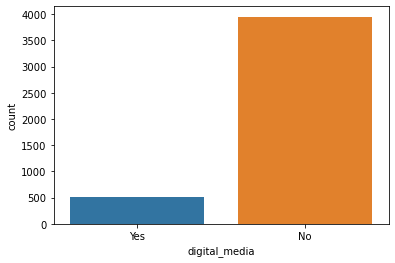

In [44]:
sns.countplot(x = el['digital_media'])
plt.show()

In [45]:
el['digital_media'].value_counts(normalize=True)

No     0.886272
Yes    0.113728
Name: digital_media, dtype: float64

11% of leads have seen the ads. Though it is still a very low number, it's better than other two platforms

### Educational channels 

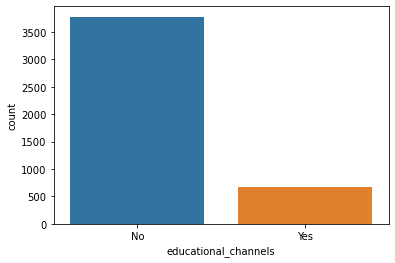

In [46]:
sns.countplot(x = el['educational_channels'])
plt.show()

In [47]:
el['educational_channels'].value_counts(normalize=True)

No     0.847465
Yes    0.152535
Name: educational_channels, dtype: float64

15% of leads saw ads on this platform. 

### Referral 

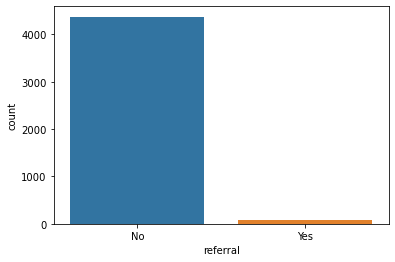

In [48]:
sns.countplot(x = el['referral'])
plt.show()

In [49]:
el['referral'].value_counts(normalize=True)

No     0.980485
Yes    0.019515
Name: referral, dtype: float64

Very low referral number

### Status : the target variable 

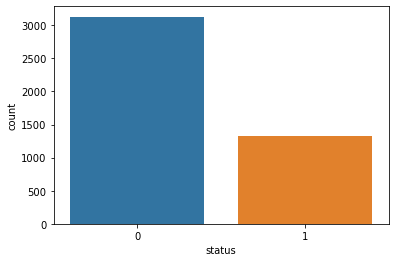

In [50]:
sns.countplot(x = el['status'])
plt.show()

In [51]:
el['status'].value_counts(normalize=True)

0    0.702109
1    0.297891
Name: status, dtype: float64

- Status : whether the lead is converted into paid customer or not, is the target variable. 
- The data do not seem to be 'very imbalanced' as we did in our practice project works.

#### Correlation among the numerical variables

<AxesSubplot:>

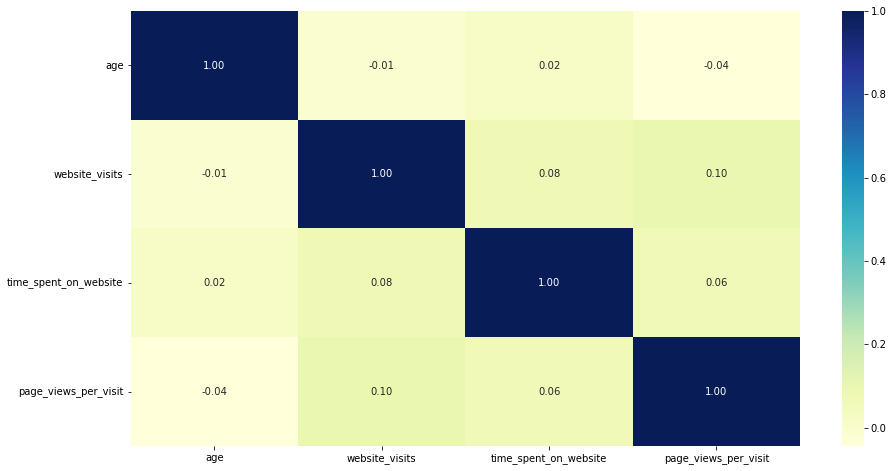

In [52]:
#Further explore the dataset
#Let me see the correlation between the numerical variables
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(el[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

Very less correlation among the numerical independent variables, which is also a good sign of absence of multicollinearity.

## Bivariate 

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [53]:
# stacked barplot helpful to see the bivariate relationships
#Defining the stacked_barplot() function
def stacked_barplot(el,predictor,target,figsize=(10,6)):
  (pd.crosstab(el[predictor],el[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

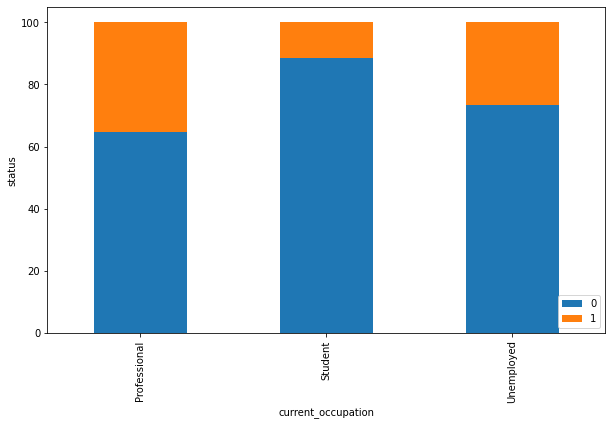

In [54]:
stacked_barplot(el, "current_occupation", "status" )

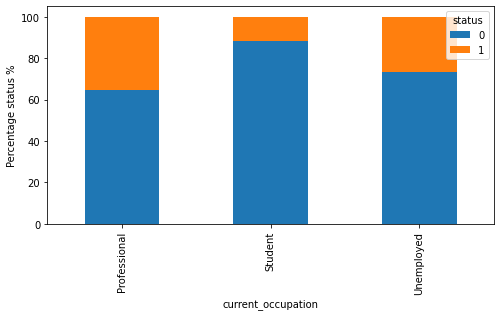

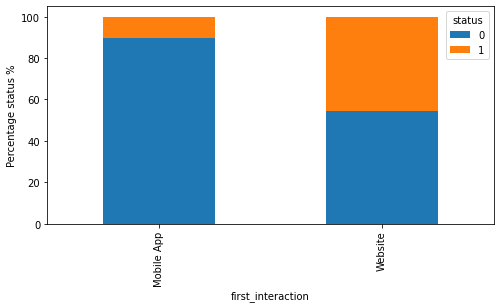

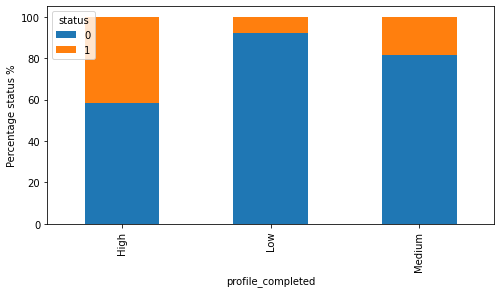

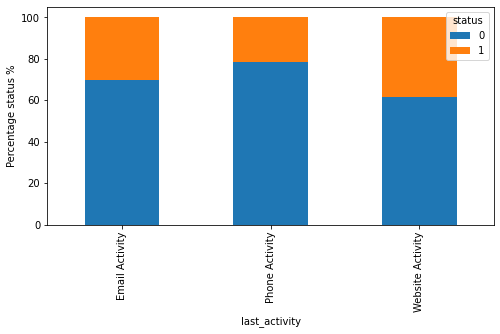

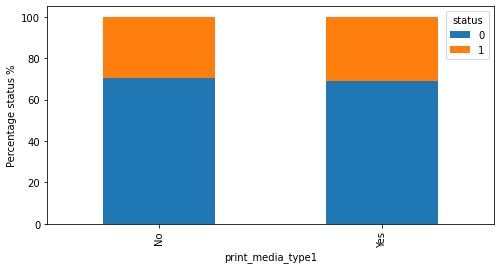

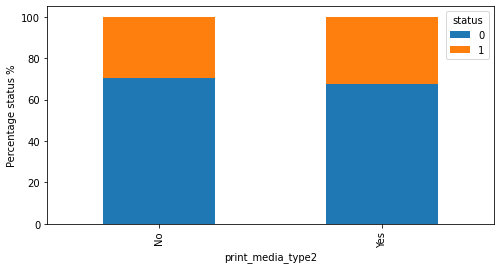

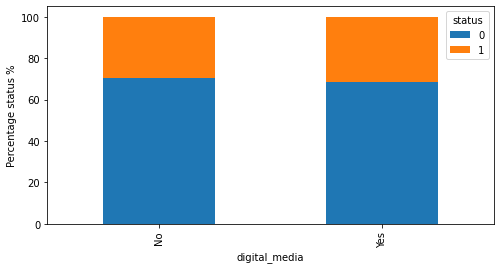

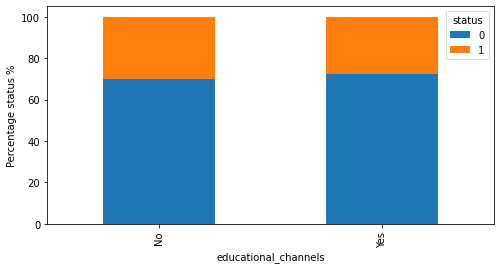

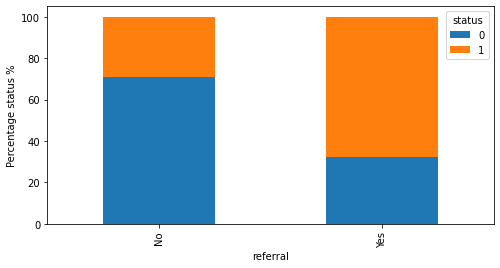

In [55]:
#Let me show the whole process which I can use to see the relationship between all IVs and DV
for i in cat_cols:
    if i!='status':
        (pd.crosstab(el[i],el['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status %')

### Observations: 
- Current occupation: Leads who are professional are more likely to be the paid customers. Unemployed leads come second but there is no much difference between professionals and unemployed. Hence the focus should on these two. 

- First interaction: The way leads first interact with ExtraaLearn—be they via mobile app or website, do not seem to be of much difference in terms of number (though website interaction is slightly higher). But leads who interact via website have higher chance of get enrolled in the program i.e. become a paid customer. 

- Profile completed: Leads whose tendency to complete the profile is high, are more likely to be the paid customers. Leads partially completing (medium) the profile are more likely to be the paid customers compared to those who have less completed the profile. 

- Last activity: Leads whose last interaction with ExtraaLearn was via website are most likely be converted to the paid customers followed by those who had last communication via email and phone. Phone seems to be less effective. 

- Media: Be it newspaper, magazine, digital media or educational channels, leads seem to be converted into paid customers in surprisingly uniform manner. 30% of leads who saw the ads have become paid customers for each platform. But more leads tend to have seen ads in educational channels. 

- Referral : There is very less referral number. But a lead who comes via reference has a very high probability of becoming a paid customer. 

In [56]:
# Analysis for numerical variables
#Though not asked, I wanted to quickly see what has been the effects for numerical variables
el.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.156869,3.255591,574.403514,3.026084
1,48.646084,3.206325,1067.835090,3.020090


### Observations: 
- The difference between the average age who became paid customers and who did not, is not that notable. But it however indicates that older the leads are, they are slightly more likely to enrol in the online couse with ExtraaLearn
- Leads who became paid customers are found to have spent time on ExtraaLearn's website double than the leads who did not enroll, on average.
- Other two--number of website visits, and number of page views seem to have little impact.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)


### Separating IV and DV

In [57]:
#First Step would be to separate predictors and the target variable 
Y= el.status
X= el.drop(columns = ['status'])

### Creating dummies

In [58]:
# create the dummies 
# Drop_first is set to True so that we can drop the redundant category of dummies
X = pd.get_dummies(X, drop_first = True)

In [59]:
# Just a quick glimpse/reminder as to whether there is imbalance in target dataset or not
for i in cat_cols:
    print(el[i].value_counts(normalize=True))
    print('*'*40)

Professional    0.565725
Unemployed      0.314939
Student         0.119336
Name: current_occupation, dtype: float64
****************************************
Website       0.553611
Mobile App    0.446389
Name: first_interaction, dtype: float64
****************************************
High      0.492822
Medium    0.483849
Low       0.023329
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.494841
Phone Activity      0.265814
Website Activity    0.239345
Name: last_activity, dtype: float64
****************************************
No     0.893226
Yes    0.106774
Name: print_media_type1, dtype: float64
****************************************
No     0.948856
Yes    0.051144
Name: print_media_type2, dtype: float64
****************************************
No     0.886272
Yes    0.113728
Name: digital_media, dtype: float64
****************************************
No     0.847465
Yes    0.152535
Name: educational_channels, dtype: float64
****

- Target ('status') seems not to be that imbalanced, so I did not do the stratified sampling here. Instead chose for the basic one 

### Splitting the data into 70% train and 30% test set

In [60]:
# Splitting the dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

### **Model evaluation criterion**

**We know that a model can make two types of wrong predictions:**

1. Predicting a lead will convert when the lead doesn't become a paid customer.
2. Predicting a lead will not convert when the lead actually converts. 

**Which case is more important for this particular case?**

* **Predicting that the lead will not convert but the lead converts**, i.e., we will lose a valuable customer. This would be of greater importance as loosing customers does not augur well for any edtech company. 

** We need to minimize this loss i.e. reduce the False Negatives (Type II errors)?**
* **ExtraaLearn hence would want the Recall score to be maximized**,
i.e. minimizing the false negatives, give us maximum Recall. Hence, the focus should be on increasing the Recall (minimizing the false negatives). Put differently, primacy should be given in identifying the true positives (TP).
Recall = TP/ TP + FN 


In [61]:
# metrics to measure the performance of the model 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not_paid_customer', 'paid_customer'], yticklabels=['Not_paid_customer', 'paid_customer'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [62]:
print(X_train.info())
print(X_train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 4601 to 242
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3120 non-null   int64  
 1   website_visits                  3120 non-null   int64  
 2   time_spent_on_website           3120 non-null   int64  
 3   page_views_per_visit            3120 non-null   float64
 4   current_occupation_Student      3120 non-null   uint8  
 5   current_occupation_Unemployed   3120 non-null   uint8  
 6   first_interaction_Website       3120 non-null   uint8  
 7   profile_completed_Low           3120 non-null   uint8  
 8   profile_completed_Medium        3120 non-null   uint8  
 9   last_activity_Phone Activity    3120 non-null   uint8  
 10  last_activity_Website Activity  3120 non-null   uint8  
 11  print_media_type1_Yes           3120 non-null   uint8  
 12  print_media_type2_Yes           

In [63]:
print(X_test.info())
print(X_test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 2093 to 4384
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1338 non-null   int64  
 1   website_visits                  1338 non-null   int64  
 2   time_spent_on_website           1338 non-null   int64  
 3   page_views_per_visit            1338 non-null   float64
 4   current_occupation_Student      1338 non-null   uint8  
 5   current_occupation_Unemployed   1338 non-null   uint8  
 6   first_interaction_Website       1338 non-null   uint8  
 7   profile_completed_Low           1338 non-null   uint8  
 8   profile_completed_Medium        1338 non-null   uint8  
 9   last_activity_Phone Activity    1338 non-null   uint8  
 10  last_activity_Website Activity  1338 non-null   uint8  
 11  print_media_type1_Yes           1338 non-null   uint8  
 12  print_media_type2_Yes          

In [64]:
#converting data types to float
# for column in ['age', 'website_visits', 'time_spent_on_website']:
#     X_train[column]=X_train[column].astype('float')
#     X_test[column]=X_test[column].astype('float')

## Building a Decision Tree model

In [65]:
# Let us build a DT model
model_tree = DecisionTreeClassifier(random_state=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Do we need to prune the tree?

### Performance on training dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2182
           1       1.00      1.00      1.00       938

    accuracy                           1.00      3120
   macro avg       1.00      1.00      1.00      3120
weighted avg       1.00      1.00      1.00      3120



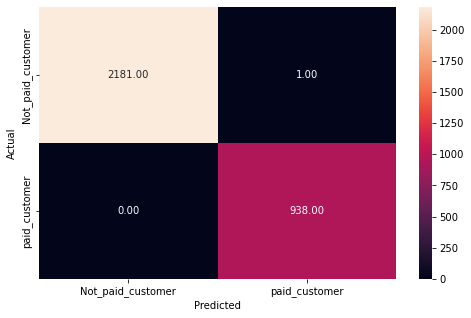

In [66]:
#Let's see how well the model performs
y_train_pred = model_tree.predict(X_train)
metrics_score(y_train, y_train_pred)

### Performance on testing data

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       948
           1       0.67      0.68      0.68       390

    accuracy                           0.81      1338
   macro avg       0.77      0.77      0.77      1338
weighted avg       0.81      0.81      0.81      1338



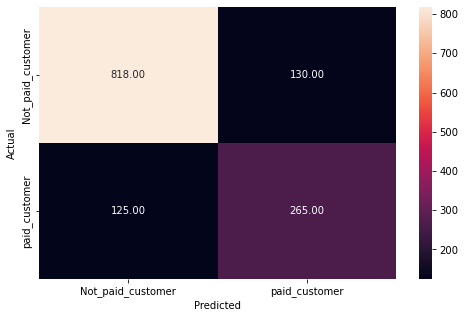

In [67]:
y_test_pred = model_tree.predict(X_test)

metrics_score(y_test, y_test_pred)

### Observations 
- Model performs very well in training compared to the testing dataset (recall score of 1 vs 0.68) leading us to suspect the problem of overfitting

#### Hyperparameter tuning

In [68]:
#Yes need to do the pruning as the dataset is overfitting
# Let's do the hyperparamenter tuning

# Choose the type of classifier
tuned_dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scores = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid = GridSearchCV(tuned_dt, parameters, scoring = scores, cv = 10)

# Fitting the grid search on the train data
grid = grid.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
tuned_dt = grid.best_estimator_

# Fit the best estimator to the data
tuned_dt.fit(X_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2182
           1       0.60      0.90      0.72       938

    accuracy                           0.79      3120
   macro avg       0.77      0.82      0.77      3120
weighted avg       0.84      0.79      0.80      3120



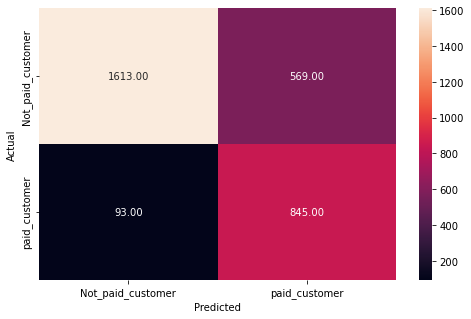

In [69]:
#again check the performance of the model
# firstly the performance of the training dataset
y_train_pred_tuned = tuned_dt.predict(X_train)

metrics_score(y_train, y_train_pred_tuned)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       948
           1       0.60      0.91      0.72       390

    accuracy                           0.79      1338
   macro avg       0.78      0.83      0.78      1338
weighted avg       0.85      0.79      0.80      1338



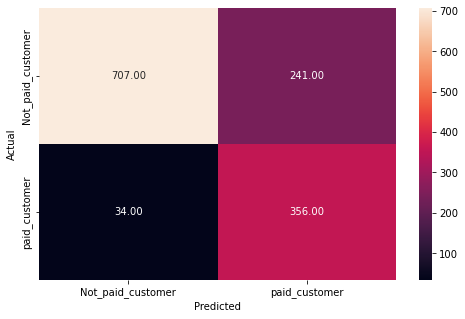

In [70]:
# secondly the performance of the test dataset
y_train_pred_tuned_test = tuned_dt.predict(X_test)

metrics_score(y_test, y_train_pred_tuned_test)

### Observation: 
- The issue of overfitting seems to be addressed with the model performing uniformly well in both training and testing subsets i.e. recall scores of 0.90 and 091. 

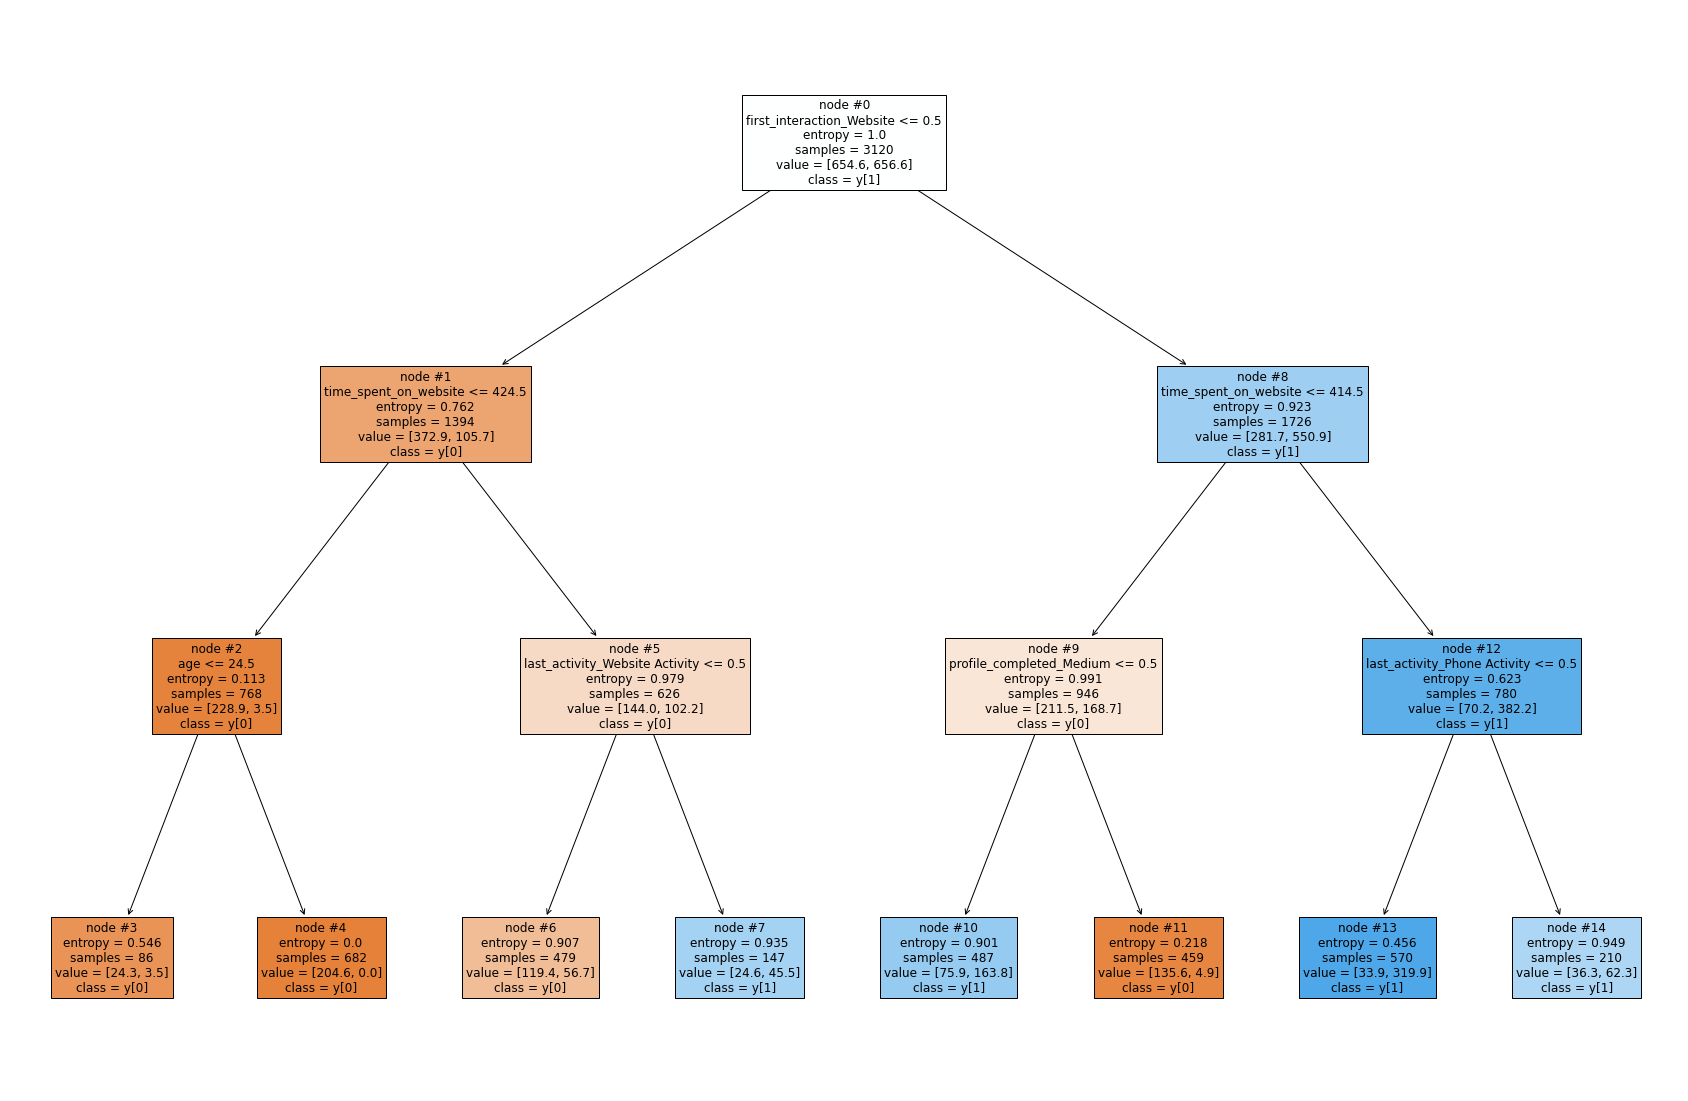

In [71]:
# Let us visulaize the tuned DT 

features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(tuned_dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### Observations
- It is important to note that blue 'leaves' represent the leads who are converted to paid customers. In other words, they are denoted as y[1]. 
- The orange leaves on the other hand represent the who did not convert into paid customers. In other words, they are represented as y[0]. 
- The other basic thing to notice here is that as the number of observations in a leaf gets bigger, its color also becomes darker.

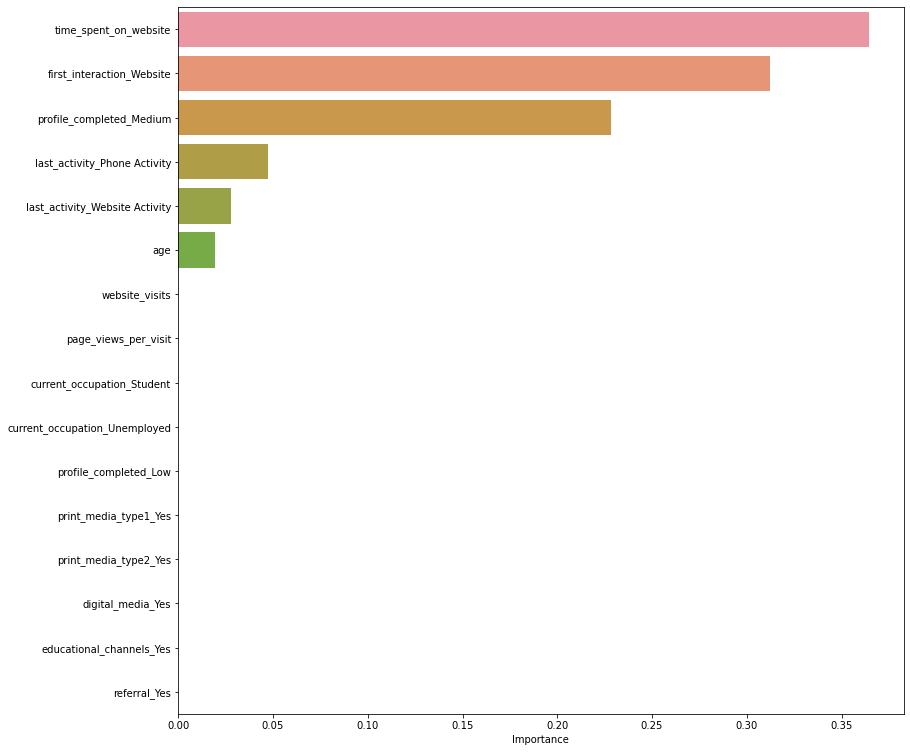

In [72]:
# Let us now look at the important features 
importances = tuned_dt.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

### Observations: 
1. Most important feature happen to be the time spent by a lead on the website which looks intuitive as well. 
2. First interaction via website happens to be the crucial feature as the tuned decision tree shows. 
3. Tuned DT happens to show that medium profile complete is the stronger predictor
4. Tuned DT shows that last activity via phone (conversation) seems to be the stronger predictor followed by website activity. 


## Building a Random Forest model

In [73]:
# Random forest classifier 
rf = RandomForestClassifier(random_state = 1)

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

## Do we need to prune the tree?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2182
           1       1.00      1.00      1.00       938

    accuracy                           1.00      3120
   macro avg       1.00      1.00      1.00      3120
weighted avg       1.00      1.00      1.00      3120



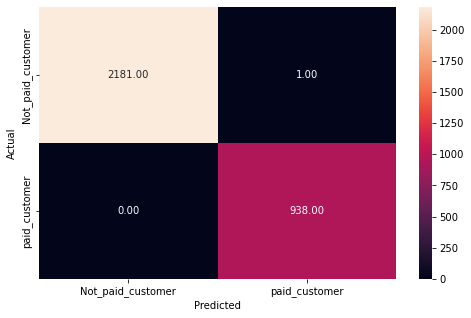

In [75]:
#performance on training data
y_pred_train_rf = rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       948
           1       0.80      0.71      0.75       390

    accuracy                           0.86      1338
   macro avg       0.84      0.82      0.83      1338
weighted avg       0.86      0.86      0.86      1338



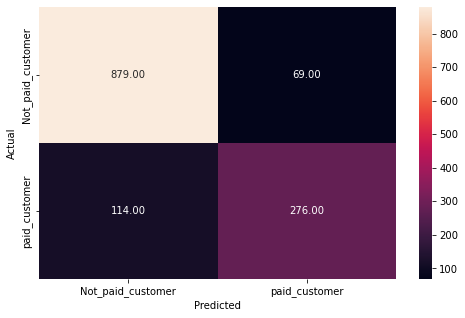

In [76]:
#performance on test data
y_pred_test_rf = rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

### Observations:
- Again the similar issue here. Random Forest model has performed well in traning subset as opposed to test subset (1 vs 0.71 recall score)

In [77]:
#Yes, we need to do the pruning
#Let's turn to hyperparameter tuning

# Choose the type of classifier
tuned_rf = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scores = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid = GridSearchCV(tuned_rf, params_rf, scoring = scores, cv = 5)

grid = grid.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
tuned_rf = grid.best_estimator_

In [78]:
# Fit the algorithm to the training data
tuned_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, min_samples_leaf=3,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2182
           1       0.85      0.93      0.89       938

    accuracy                           0.93      3120
   macro avg       0.91      0.93      0.92      3120
weighted avg       0.93      0.93      0.93      3120



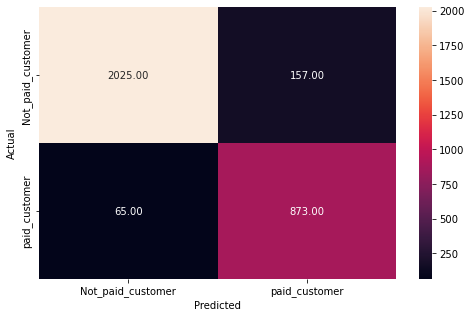

In [79]:
#performance on training data
y_pred_train_rf_tuned = tuned_rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       948
           1       0.73      0.79      0.76       390

    accuracy                           0.86      1338
   macro avg       0.82      0.84      0.83      1338
weighted avg       0.86      0.86      0.86      1338



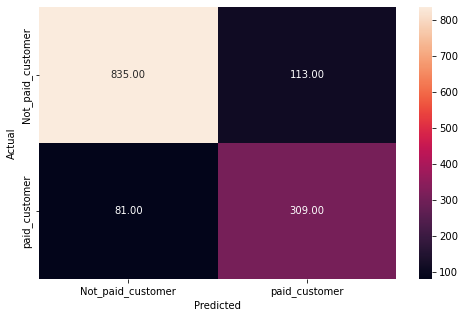

In [80]:
#performance on testing data
y_pred_test_rf_tuned = tuned_rf.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

### Observation: 
- Performance wise, the tuned model has helped to address slightly the issue of overfitting but as the difference in recall scores of testing and training subsets show that still the issue persists


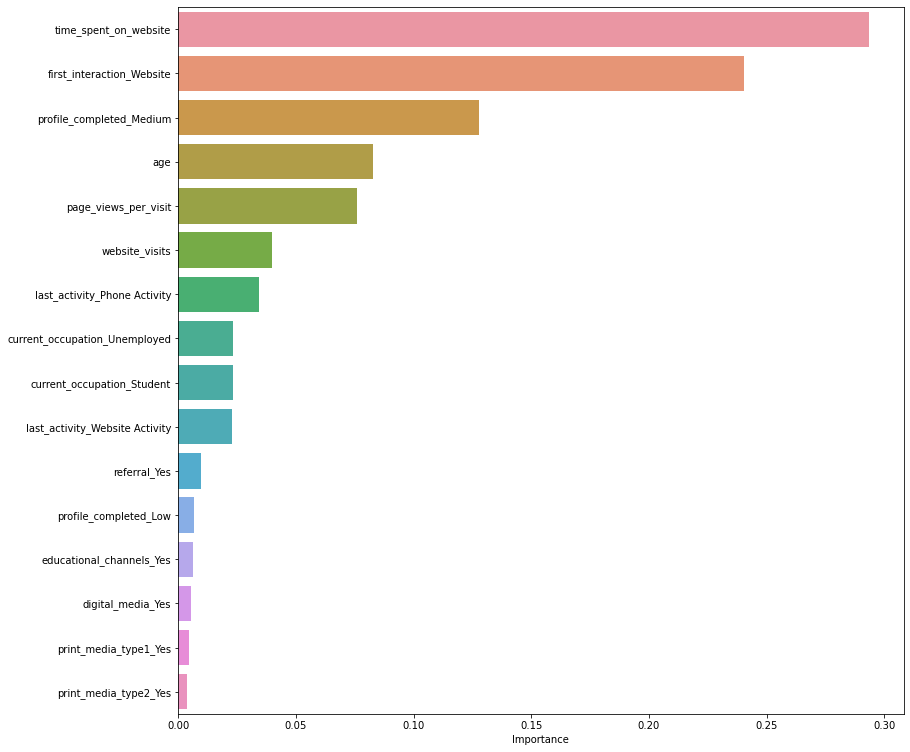

In [81]:
# Let us again look at the important features for RF 
importances = tuned_rf.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

### Observations: 
- Time spent on website, first interaction via website, medium completion of profile, and age happen to be the most important features.  

## Actionable Insights and Recommendations

### Conclusion: 
- I tried two models--Decision Tree and Random Forest. Analyses of those two models help me to determine the major factors that could play significant role in converting the leads to the paid customers in ExtraaLearn startup.
- Tuned Random Forest seems to have better recall scores, and other relevant scores that tune decision tree. But RF seems to be still suffering from overfitting even after tuning. Tuned DT is however free from the issue.

### Recommendations:
- A lead's conversion to paid customer is very likely when it is being referred to the lead by somebody (perhaps already enrolled or a past student in the program). Hence, ExtraaLearn should think about the ways to promote such referral. But the challenge has been that the referral rate is very minimal. ExtraLearn can come up with some scheme that can encourage past students or current students, for example, to promote referral. In an instance, they can be offered some course modules free of cost, or a small portion of scholarship can be given to those leads who gets enrolled via referral link. 
- Professionals and unemployed account for almost 88% of the leads. They are either wanting to upskill or look for new job opportunities. Hence, ExtraaLearn can focus on them. One of the ways could be offering the skills that are in huge demand, and can help people in getting job especially in the current demand of data science, and Artificial Intelligence. 
- Leads who are professional are more likely to be the paid customers. Unemployed leads come second but there is no much difference between professionals and unemployed. Hence the focus should on these two. 
- The way leads first interact with ExtraaLearn—be they via mobile app or website, do not seem to be of much difference in terms of number (though website interaction is slightly higher). But leads who interact via website have higher chance of get enrolled in the program i.e. become a paid customer. First interaction via website also happens to be the crucial feature as the tuned decision tree shows. 
- Leads whose tendency to complete the profile is high, are more likely to be the paid customers. Leads partially completing (medium) the profile are more likely to be the paid customers compared to those who have less completed the profile.Tuned DT happens to show that medium profile complete is the stronger predictor. Hence, focus should be on these two( high, and medium profile completion). 
- Be it newspaper, magazine, digital media or educational channels, leads seem to be converted into paid customers in surprisingly uniform manner. 30% of leads who saw the ads have become paid customers for each platform. But more leads tend to have seen ads in educational channels. Given the changing landscape of people consuming information, education channels should be prioritized, for example, online forums or discussion threads.
- Leads who became paid customers are found to have spent time on ExtraaLearn's website double than the leads who did not enroll, on average. So ExtraaLearn should pursue those who spent time to make sure that they do not miss the ‘sure- shot’ customers. On the other hand, they can think of making the website user friendly, for example, to keep leads spend more time as much as possible.